In [ ]:
import numpy as numpy
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob
from tensorflow import keras
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential
from keras_preprocessing.image import load_img,img_to_array,ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# CNN

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(224,224,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.2))

In [ ]:
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.2))

In [ ]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.2))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(units=1,activation='sigmoid'))
model.add(Flatten())

# compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

***                        Training Data***

In [ ]:
# function1
def preproceesingImages1(path):
  image_data = ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/255,horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
  return image

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/brain tumor detection/training dataset'
train_data = preproceesingImages1(path)

Found 253 images belonging to 2 classes.


In [ ]:
# function2
def preproceesingImages2(path):
  image_data = ImageDataGenerator(rescale=1/255)
  image = image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')
  return image

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/brain tumor detection/testing dataset'
test_data = preproceesingImages2(path)

Found 253 images belonging to 2 classes.


In [ ]:
# Early stopping and checkpoints
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [ ]:
es = EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=5,mode="auto")

mc = ModelCheckpoint(monitor='val_accuracy',filepath="./bestModel",verbose=1,save_best_only=True,mode="auto")

cb = [es,mc]

# print(train_data)

# **Real Training After early stopping and check point here**

In [ ]:
hs = model.fit_generator(generator=train_data,steps_per_epoch=8,epochs=30,verbose=1,validation_data=test_data,validation_steps=16,callbacks=cb)

<ipython-input-18-b779962c9a2c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hs = model.fit_generator(generator=train_data,steps_per_epoch=8,epochs=30,verbose=1,validation_data=test_data,validation_steps=16,callbacks=cb)


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 5.5630 - accuracy: 0.5889


Epoch 1: val_accuracy improved from -inf to 0.61265, saving model to ./bestModel


8/8 [==============================] - 134s 17s/step - loss: 5.5630 - accuracy: 0.5889 - val_loss: 5.9068 - val_accuracy: 0.6126
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 5.9068 - accuracy: 0.6126

8/8 [==============================] - 4s 432ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 5.9068 - accuracy: 0.6126

8/8 [==============================] - 4s 444ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 5.9068 - accuracy: 0.6126

8/8 [==============================] - 3s 432ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 5.9068 - accuracy: 0.6126

8/8 [==============================] - 3s 435ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 5.9068 - accuracy: 0.6126

8/8 [==============================] - 4s 436ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 5.9068 - accuracy: 0.6126

8/8 [==============================] - 3s 434ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 5.9068 - accuracy: 0.6126

8/8 [==============================] - 4s 432ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 5.9068 - accuracy: 0.6126

8/8 [==============================] - 3s 431ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 5.9068 - accuracy: 0.6126

8/8 [==============================] - 3s 426ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 5.9068 - accuracy: 0.6126

8/8 [==============================] - 3s 430ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 5.9068 - accuracy: 0.6126

8/8 [==============================] - 4s 446ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 5.9068 - accuracy: 0.6126

8/8 [==============================] - 4s 437ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 5.9068 - accuracy: 0.6126

8/8 [==============================] - 4s 433ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 5.9068 - accuracy: 0.6126

8/8 [==============================] - 4s 439ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 5.9068 - accuracy: 0.6126

8/8 [==============================] - 4s 437ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 5.9068 - accuracy: 0.6126

8/8 [==============================] - 4s 444ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 5.9068 - accuracy: 0.6126

8/8 [==============================] - 4s 435ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 5.9068 - accuracy: 0.6126

8/8 [==============================] - 3s 429ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 5.9068 - accuracy: 0.6126

8/8 [==============================] - 3s 424ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 5.9068 - accuracy: 0.6126

8/8 [==============================] - 4s 445ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 5.9068 - accuracy: 0.6126

8/8 [==============================] - 4s 435ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 5.9068 - accuracy: 0.6126

8/8 [==============================] - 3s 432ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 5.9068 - accuracy: 0.6126

8/8 [==============================] - 4s 444ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 5.9068 - accuracy: 0.6126

8/8 [==============================] - 3s 427ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 5.9068 - accuracy: 0.6126

8/8 [==============================] - 4s 436ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 5.9068 - accuracy: 0.6126

8/8 [==============================] - 3s 431ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 5.9068 - accuracy: 0.6126

8/8 [==============================] - 4s 436ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 5.9068 - accuracy: 0.6126

8/8 [==============================] - 3s 433ms/step - loss: 5.9068 - accuracy: 0.6126
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 5.9068 - accuracy: 0.6126

8/8 [==============================] - 3s 424ms/step - loss: 5.9068 - accuracy: 0.6126


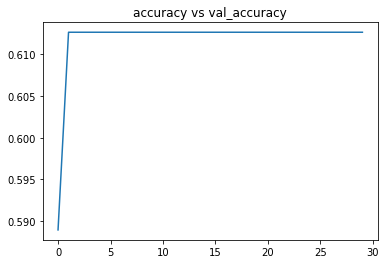

In [ ]:
h = hs.history
h.keys()
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c='red')
plt.title('accuracy vs val_accuracy')
plt.show()

In [ ]:
from keras.models import load_model
model = load_model('bestModel')

acc = model.evaluate_generator(test_data)[1]
print('accuracy is : ',acc*100,"%")

<ipython-input-20-36ae81b6eb92>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(test_data)[1]


accuracy is :  61.264824867248535 %


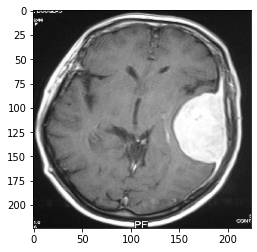

1/1 [==============================] - 0s 172ms/step
[[1.]]


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/brain tumor detection/testing dataset/yes/Y103.jpg"

import numpy as np 

img = load_img(path,target_size=(224,224))
input_arr = img_to_array(img)/255
plt.imshow(input_arr)
plt.show()
input_arr.shape

input_arr = np.expand_dims(input_arr,axis=0)
pred = model.predict(input_arr)
print(pred)